# SKLearn IRIS example
The IRIS dataset is a dataset containing data from 3 disctinct type of IRIS flowers (the setosa, versicolor and virginica). This dataset is included as a toy dataset in the sklearn library.

See: https://en.wikipedia.org/wiki/Iris_flower_data_set

See: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

## Labels
Data for Machine Learning is always numeric. The petal/sepal length and width is numeric by nature, the names are not, so that is why in this dataset each flower is represented by a number 0, 1 or 2. And a seperate index is kept with the corresponding names.

NB: It is not always a good idea to just convert categories into numbers as they are not ordinal. That is why a lot of times one-hot is used as conversion. In this case an array is used with as much dimensions as there are categories. For each row all values are 0 except for the active category that is 1 (or 'hot')

In [2]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Input and output data
In our algorithm we want to develop we want to create a function that has some input as data and gives a result. In math we write functions like **f(X) = y**, so that is why these letters a common in ML for naming

In [3]:
X = iris.data
y = iris.target

## Visualizing our data
When working with data it is usefull to get a grasp of what the values in our data are. This way we can determine if the data we have can be used. 

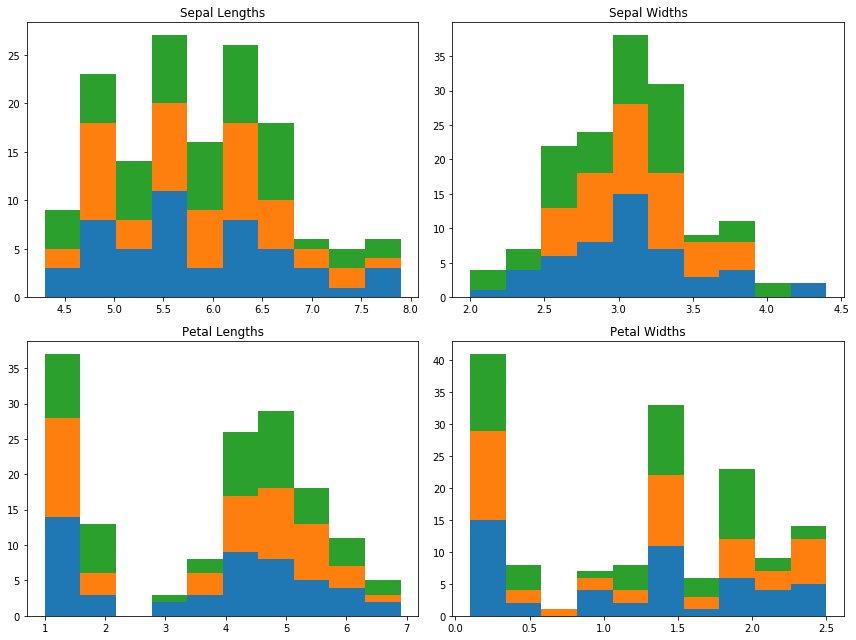

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
ax0, ax1, ax2, ax3 = axes.flatten()

sepal_lengths = iris.data[:, 0::4].reshape([ 50, 3 ])
ax0.set_title('Sepal Lengths')
ax0.hist(sepal_lengths, stacked=True);

sepal_widths = iris.data[:, 1::4].reshape([ 50, 3 ])
ax1.set_title('Sepal Widths')
ax1.hist(sepal_widths, stacked=True);

petal_lengths = iris.data[:, 2::4].reshape([ 50, 3 ])
ax2.set_title('Petal Lengths')
ax2.hist(petal_lengths, stacked=True);

petal_widths = iris.data[:, 3::4].reshape([ 50, 3 ])
ax3.set_title('Petal Widths')
ax3.hist(petal_widths, stacked=True);


fig.tight_layout()
plt.show()

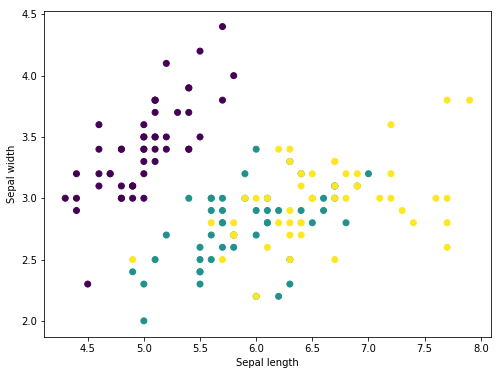

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(iris.data[:, :2][:, 0], iris.data[:, :2][:, 1], c=iris.target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

## Split into a training and test set
We split up the whole dataset into a training set and a test set. The training set is used to train our classifier, and our test set is used to determine the accuracy. In this case we use 25% of the rows for training.

In [6]:
# Initialze a RandomState with a constant seed to make the split consistent
from numpy.random import RandomState
prng = RandomState(100)

# Split the dataset into a training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=prng)

## Choose a classifier and train it
The sklearn library has a number of classifiers to use, or you can even write your own. What they have in common is that they have a "fit" method for training and a "predict" method to do a prediction after training. 

In this case we use a KNN classifier or K nearest neighbors classifiers. What it does is look at the given values and calculate the distance to each value for all other values. Distance can mean different things but default it means the euclidean distance (or straight line distance). It looks at K neighbors (in our case 5) and see what label it has. The prevailing label wins and is given as output. 

For a whole nearest neighbors it has to consider all other values in the training set to determine it's nearest neighbords. This makes this algorithm slow for large datasets. Therefor there are algorithms to use a more limited selection. But we disabled this in our case (we use bruteforce).

See: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(5, algorithm='brute')

#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train);

## Accuracy
The sklearn library has a utility which helps us determine it accuracy. We use the test set for this. We get the predictions for the test set and compare it to the actual labels

In [8]:
from sklearn.metrics import accuracy_score
predictions = classifier.predict(X_test)
accuracy_score(y_test, predictions)

0.97368421052631582